<br>

# Sci-Stats Notebook
[Official Website](https://www.scipy.org/)
***

## Author: Silvio Dunst

<br>

# $t$-Test
***
## What is a $t$-test 
A $t$-tests is a statistical test that is used to compare the means of two groups. It is often used in hypothesis testing to determine whether a process or treatment actually has an effect on the population of interest, or whether two groups are different from one another. $t$-tests are among the most common statistical tests performed in world.

We have three types of main t-tests. One of them called sample test. The other is just a standard t-test sometimes called sample independent t-test and then there is a paired sample t-test as well. They all follow the same pattern.

This notebook focuses on the practicalities of performing $t$-tests in Python.

## When to use a $t$-test
A $t$-test can only be used when comparing the means of two groups a pairwise comparison. If you want to compare more than two groups, or if you want to do multiple pairwise comparisons, use an ANOVA test or a post-hoc test[1].

### Using the iris dataset
What is the iris data set?


In [1]:
# Efficient numerical arrays.
import numpy as np

# Data frames.
import pandas as pd

# Alternative statistics package.
import statsmodels.stats.weightstats as stat

# Mains statistics package.
import scipy.stats as ss

# Plotting.
import matplotlib.pyplot as plt

# Fancier plotting.
import seaborn as sns

# Importing the statistics module
import statistics

# Better sized plots.
plt.rcParams['figure.figsize'] = (12, 8)

# Nicer colours and styles for plots.
plt.style.use("ggplot")

In [2]:
# load the iris data set into pandas
# Import the Fisher's Iris data set form the Internet
dfiris = pd.read_csv("https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")
dfiris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
# Slice the data set in two groups of sepal_length and species
dfslice = dfiris[['sepal_length', 'species']]


# Slice the data set in two groups of species setosa and versicolor
dfslice = dfslice.iloc[0:100]
dfslice


,sepal_length,species
0,5.1,setosa
1,4.9,setosa
2,4.7,setosa
3,4.6,setosa
4,5.0,setosa
...,...,...
95,5.7,versicolor
96,5.7,versicolor
97,6.2,versicolor
98,5.1,versicolor


### Plot the data

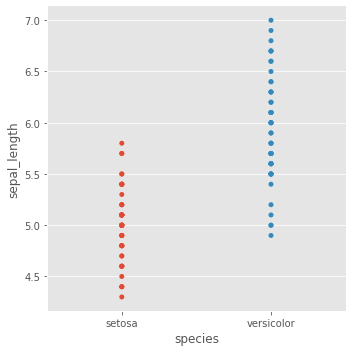

In [4]:
# use seaborn categorical plot.
sns.catplot(x='species', y='sepal_length', jitter=False, data=dfslice);

In [5]:
# Use of the scipy.stats version.
# t_ss is the t value of T statistic is a statistic (a quantity derived from the sample)used in statistical 
# hypothesis testing
# p_ss is the probbilty value 
setosavalues = dfslice[['sepal_length']][0:50]
versicolorvalues = dfslice[['sepal_length']][50:100]

t_ss, p_ss = ss.ttest_ind(setosavalues, versicolorvalues) 
t_ss = t_ss[0] # extract the data from an array/list
p_ss = p_ss[0] # extract the data from an array/list

#
print(f"t-value: {t_ss}\np-value: {p_ss}")
print(f"P_scipy: {p_ss:0.2f}") # round to two digits after the dot as a float

t-value: -10.52098626754911
p-value: 8.985235037487077e-18
P_scipy: 0.00


In [6]:
# Use the statsmodels version.
setosavalues = dfslice[['sepal_length']][0:50]
versicolorvalues = dfslice[['sepal_length']][50:100]

t_sm, p_sm, d_sm = stat.ttest_ind(setosavalues, versicolorvalues)
t_sm = t_sm[0] # extract the from an array/list
p_sm = p_sm[0] # extract the from an array/list

print(f"t-value: {t_sm}\np-value: {p_sm}\np-value: {p_sm:0.20f}\nDeg Free: {d_sm}")
print(f"P_statsmodels: {p_sm:0.2f}") # round to two digits after the dot as a float


t-value: -10.52098626754912
p-value: 8.985235037486755e-18
p-value: 0.00000000000000000899
Deg Free: 98.0
P_statsmodels: 0.00


The hypothesis that the sepal length Setosa iris flower is the same as the spepal length of the Versicolor iris flower. 
The statsmodel gave us an t-value of -10.52 and a probabilty p value of 8.98e-18 = 0.00000000000000000899. It means we are not reject the hypothesis. Our p value is way below the lowest probability value in t-test table.

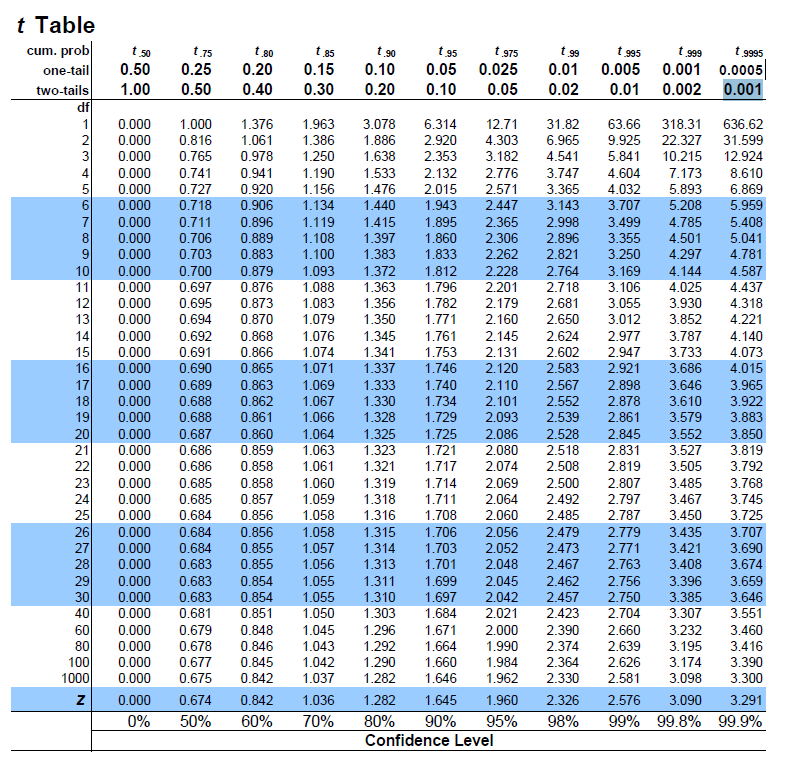

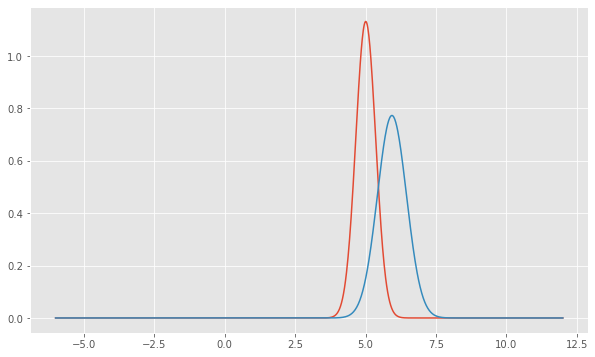

In [7]:
# Let's create a plot with the following x values.
x = np.linspace(-2.0, 4.0, 1000)

# We'll have plots of two different populations on one set of axes.
# the mean of the petal length of setosa

#calculate the mean and standard deviation for setosa
dfsetoas = dfslice.iloc[0:50]
setosamean = dfsetoas.mean()
setosastd = dfsetoas.std()

#calculate the mean and standard deviation for versicolor
dfversicolor = dfslice.iloc[50:100]
versicolormean = dfversicolor.mean()
versicolorstd = dfversicolor.std()
versicolorstd

y_a = ss.norm.pdf(x*3, setosamean, setosastd)
y_b = ss.norm.pdf(x*3, versicolormean, versicolorstd)

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(x*3, y_a)
ax.plot(x*3, y_b)

plt.show()


<br>

## ANOVA
***

## What is a ANOVA test 
ANOVA stands for Analysis of Variance. It was developed by Ronald Fisher in 1918. ANOVA determines whether three or more populations are statistically different from each other. One-way ANOVA is the most basic form. There are other variations that can be used in different situations, including:Two-way ANOVA, Factorial ANOVA, F-test etc.

## How does ANOVA test work?
The ANOVA test used to compare the means of more than 2 groups (t-test can be used to compare 2 groups).
ANOVA helps you to find out whether the differences between groups of data are statistically significant. It works by analysing the levels of variance within the groups through samples taken from each of them.
If there is a lot of variance (spread of data away from the mean) within the data groups, then there is more chance that the mean of a sample selected from the data will be different due to chance.

As well as looking at variance within the data groups, ANOVA takes into account sample size (the larger the sample, the less chance there will be of picking outliers for the sample by chance) and the differences between sample means (if the means of the samples are far apart, it’s more likely that the means of the whole group will be too).

All these elements are combined into a F value, which can then be analysed to give a probability (p-value) of whether or not differences between your groups are statistically significant.

A one-way ANOVA compares the effects of an independent variable (a factor that influences other things) on multiple dependent variables. Two-way ANOVA does the same thing, but with more than one independent variable, while a factorial ANOVA extends the number of independent variables even further[2].

In [10]:
# read in data set
dfdiet = pd.read_csv("https://www.sheffield.ac.uk/polopoly_fs/1.570199!/file/stcp-Rdataset-Diet.csv")
dfdiet

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,25,,41,171,60,2,60.0
1,26,,32,174,103,2,103.0
2,1,0,22,159,58,1,54.2
3,2,0,46,192,60,1,54.0
4,3,0,55,170,64,1,63.3
...,...,...,...,...,...,...,...
73,74,1,35,183,83,3,80.2
74,75,1,49,177,84,3,79.9
75,76,1,28,164,85,3,79.7
76,77,1,40,167,87,3,77.8


In [14]:
# Filter out the rows for the Diet type 1
dfdiet1 = dfdiet.loc[dfdiet['Diet']==1]
dfdiet1

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
2,1,0,22,159,58,1,54.2
3,2,0,46,192,60,1,54.0
4,3,0,55,170,64,1,63.3
5,4,0,33,171,64,1,61.1
6,5,0,50,170,65,1,62.2
7,6,0,50,201,66,1,64.0
8,7,0,37,174,67,1,65.0
9,8,0,28,176,69,1,60.5
10,9,0,28,165,70,1,68.1
11,10,0,45,165,70,1,66.9


In [15]:
# Filter out the rows for the Diet type 2
dfdiet2 = dfdiet.loc[dfdiet['Diet']==2]
dfdiet2

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,25,,41,171,60,2,60.0
1,26,,32,174,103,2,103.0
16,27,0,44,174,58,2,60.1
17,28,0,37,172,58,2,56.0
18,29,0,41,165,59,2,57.3
19,30,0,43,171,61,2,56.7
20,31,0,20,169,62,2,55.0
21,32,0,51,174,63,2,62.4
22,33,0,31,163,63,2,60.3
23,34,0,54,173,63,2,59.4


In [16]:
# Filter out the rows for the Diet type 3
dfdiet3 = dfdiet.loc[dfdiet['Diet']==3]
dfdiet3

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
30,52,0,51,165,60,3,53.0
31,53,0,35,169,62,3,56.4
32,54,0,21,159,64,3,60.6
33,55,0,22,169,65,3,58.2
34,56,0,36,160,66,3,58.2
35,57,0,20,169,67,3,61.6
36,58,0,35,163,67,3,60.2
37,59,0,45,155,69,3,61.8
38,60,0,58,141,70,3,63.0
39,61,0,37,170,70,3,62.7


In [24]:
# Calculate the weight loss per Diet
# Diet 1
wldiet1 = dfdiet1["pre.weight"].mean() - dfdiet1["weight6weeks"].mean()
print("The average Weight loss for Diet1 is: "+ str(wldiet1))

# Diet 2
wldiet2 = dfdiet2["pre.weight"].mean() - dfdiet2["weight6weeks"].mean()
print("The average Weight loss for Diet2 is: "+ str(wldiet2))

# Diet 3
wldiet3 = dfdiet2["pre.weight"].mean() - dfdiet3["weight6weeks"].mean()
print("The average Weight loss for Diet3 is: "+ str(wldiet3))

The average Weight loss for Diet1 is: 3.299999999999997
The average Weight loss for Diet2 is: 3.0259259259259323
The average Weight loss for Diet3 is: 2.629629629629619


### Anova Test

In [26]:
# https://www.youtube.com/watch?v=EWYzeZbchR0 [3.]
# Mains statistics package.
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [33]:
model = ols ('pre.weight ~ weight6weeks', data = dfdiet).fit
anova_result = sm.stats.anova_lm(model, typ= 2)
print(anova_result)

PatsyError: Error evaluating factor: NameError: name 'pre' is not defined
    pre.weight ~ weight6weeks
    ^^^^^^^^^^

In [31]:
# Mains statistics package.
import scipy.stats as stats

In [32]:
stats.f_oneway(dfdiet1,dfdiet2,dfdiet3)

ValueError: could not convert string to float: ''

<br>

## References

    [1]: https://www.scribbr.com/statistics/t-test/
    [2]: https://www.qualtrics.com/uk/experience-management/research/anova/
    [3]: https://www.youtube.com/watch?v=EWYzeZbchR0

<br>

***

# End